In [2]:
from azureml.core import Workspace, Dataset
import numpy as np 
import pandas as pd 

keyvault = ws.get_default_keyvault()
secret_subscription_id_value = keyvault.get_secret(name="subscriptionid")
resource_group = 'EXPLORATION'
workspace_name = 'exploration'

workspace = Workspace(secret_subscription_id_value, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='explorationdataasset')
dataset.download(target_path='.', overwrite=True)

df = pd.read_csv('./weatherAus.csv', engine='python')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df = df.sort_values(['Location', 'Date'])
df = df.reset_index(drop=True)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/1/2009,Adelaide,16.9,22.9,0.0,NaN,10.9,SW,50.0,SW,...,40.0,1011.3,1012.4,NaN,NaN,18.1,22.5,No,0.0,No
1,1/1/2010,Adelaide,17.6,28.1,0.0,NaN,NaN,WSW,41.0,SSE,...,45.0,1009.8,1008.3,NaN,NaN,21.3,27.0,No,0.0,No
2,1/1/2011,Adelaide,18.2,28.6,0.0,NaN,7.9,WSW,43.0,NW,...,48.0,1013.0,1011.3,NaN,NaN,20.5,25.1,No,0.0,No
3,1/1/2013,Adelaide,14.4,30.8,0.0,NaN,13.9,W,37.0,SW,...,30.0,1016.4,1015.6,NaN,NaN,23.7,28.5,No,0.0,No
4,1/1/2014,Adelaide,22.0,33.0,NaN,NaN,0.5,WSW,43.0,ENE,...,50.0,1006.1,1007.0,NaN,NaN,29.8,29.7,NaN,4.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,9/9/2012,Woomera,5.4,21.6,0.0,6.6,11.1,SE,35.0,ESE,...,19.0,1028.8,1023.3,1.0,0.0,12.2,21.0,No,0.0,No
142189,9/9/2013,Woomera,18.6,27.3,0.0,12.0,8.9,W,48.0,W,...,27.0,1014.0,1010.5,5.0,2.0,21.1,26.6,No,0.0,No
142190,9/9/2014,Woomera,11.1,25.3,0.0,16.0,9.0,WSW,81.0,SW,...,20.0,1010.1,1007.0,0.0,7.0,17.7,23.3,No,0.0,No
142191,9/9/2015,Woomera,9.4,21.2,0.0,3.8,10.7,SE,33.0,SSE,...,38.0,1032.2,1028.9,7.0,1.0,13.1,20.1,No,0.0,No


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,142193,3436,5/11/2017,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,142193,49,Canberra,3418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,141556,NaN,NaN,NaN,12.1864,6.40328,-8.5,7.6,12,16.8,33.9
MaxTemp,141871,NaN,NaN,NaN,23.2268,7.11762,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787,NaN,NaN,NaN,2.34997,8.46517,0,0,0,0.8,371
Evaporation,81350,NaN,NaN,NaN,5.46982,4.18854,0,2.6,4.8,7.4,145
Sunshine,74377,NaN,NaN,NaN,7.62485,3.78152,0,4.9,8.5,10.6,14.5
WindGustDir,132863,16,W,9780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,132923,NaN,NaN,NaN,39.9843,13.5888,6,31,39,48,135
WindDir9am,132180,16,N,11393,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_adelaide = df
df_adelaide = df_adelaide.drop(['RISK_MM', 'Rainfall'], axis=1)  # 'Location'

# Drop RISKMM. If rain in mm is greater than 1 mm, RainTomorrow is 'yes'. If we keep Riskmm and drop RainTomorrow, 
# contd....it will become a regression problem. Now, it is a classification problem
# also dropping Rainfall as rainfall is lagged version of RiskMM
# Temporarily dropping location as its name is present in df name itself.


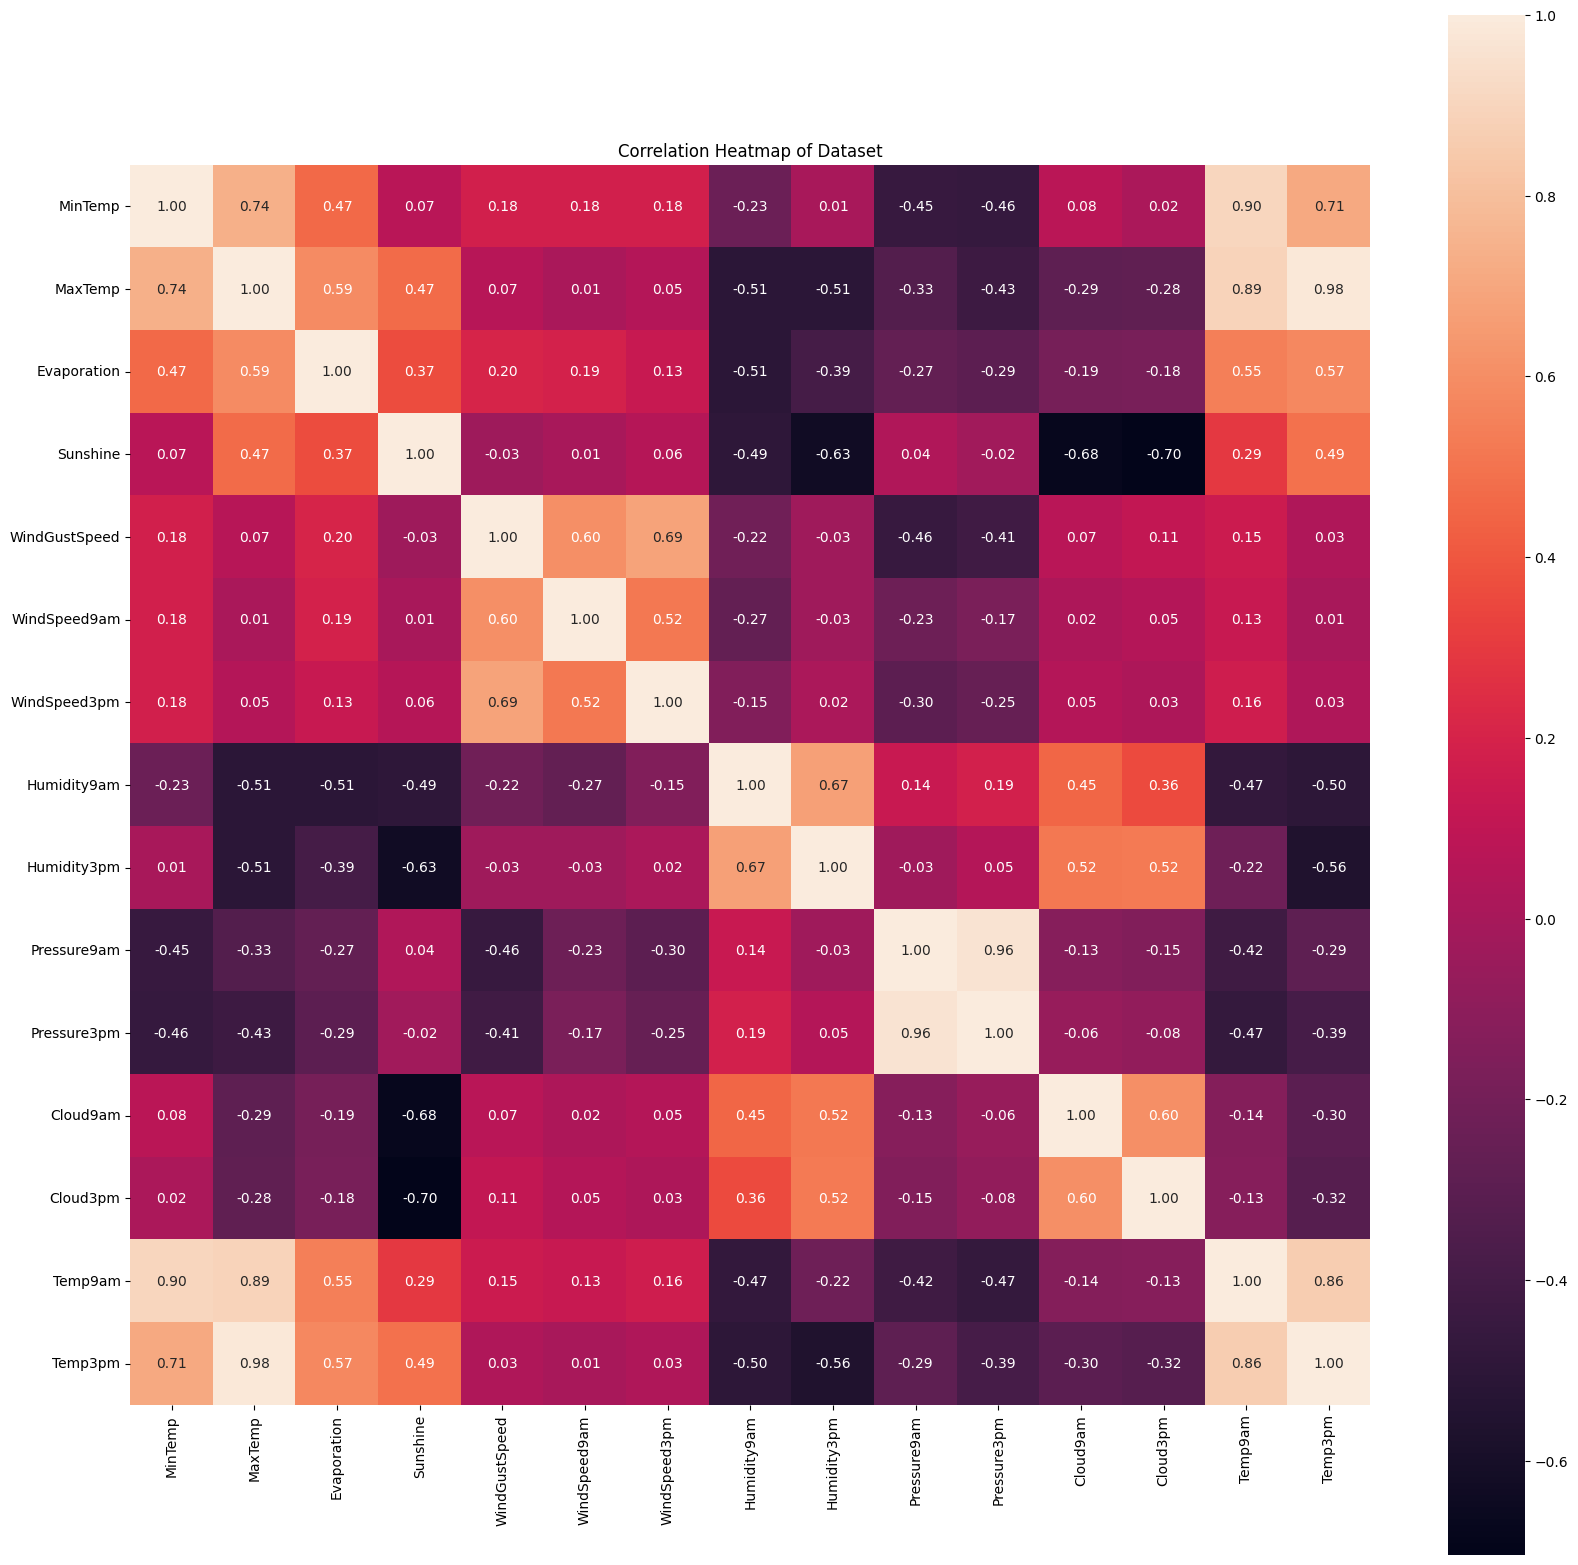

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

def correlation_plot(df):
    # correlation analysis for numerical attributes
    corr_matrix = df.corr()

    # Create correlation heatmap
    plt.figure(figsize=(20,20))
    plt.title('Correlation Heatmap of Dataset')
    a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    a.set_yticklabels(a.get_yticklabels(), rotation=0)           
    plt.show()
    
df_adelaide = df_adelaide.dropna(how='all', axis=1)  # drop all columns where all values are NA

correlation_plot(df_adelaide)  # Based on correlation outputm drop pressure3PM, temp9am, temp3pm

# Inference:
# Correlation plot shows multiple attributes which are closely correlated with each other (coefficient > 0.9) 
# and hence, need to be removed

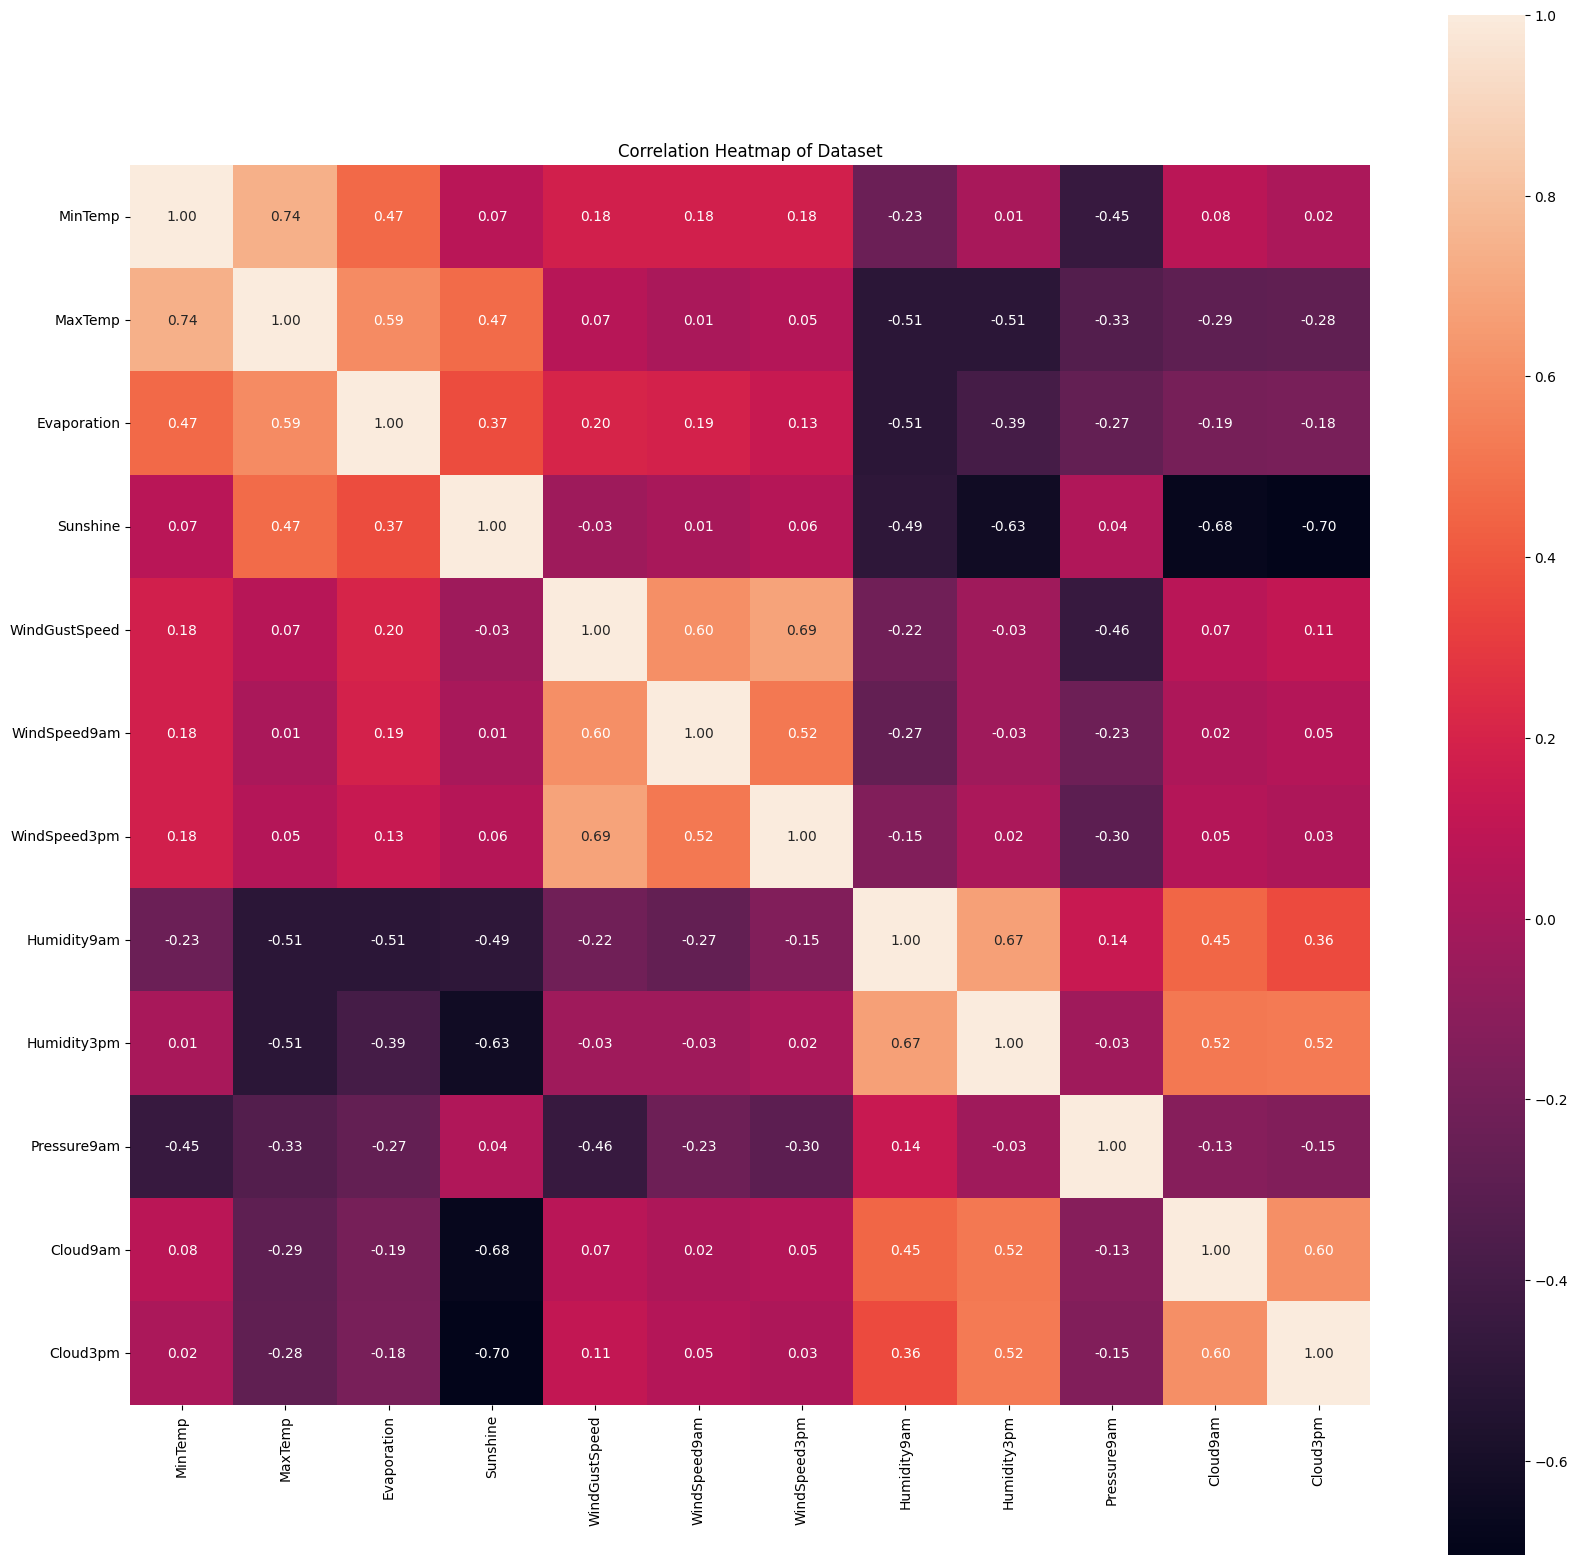

In [11]:
df_adelaide = df_adelaide.drop(["Pressure3pm", "Temp9am", "Temp3pm"], axis=1)  # drop all columns where all values are NA

correlation_plot(df_adelaide)  

In [12]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY,alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [13]:
# ChiSq test to see if categorical vars can be removed as a part of feature elimination.

cT = ChiSquare(df_adelaide)
testColumns = ['Location', 'WindGustDir','WindDir9am','WindDir3pm']  # , 'month']
for var in testColumns:
    cT.TestIndependence(colX=var,colY='RainTomorrow')

# df_adelaide =  df_adelaide.drop('month', axis=1)

# Except MONTH, Nothing can be removed as P value is greater than alpha for all vars

Location is IMPORTANT for Prediction
WindGustDir is IMPORTANT for Prediction
WindDir9am is IMPORTANT for Prediction
WindDir3pm is IMPORTANT for Prediction


In [14]:
df_adelaide.describe(include='all').T

df_adelaide =  df_adelaide.drop(['Evaporation','Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# Evaporation and Sunshine have only 55% values approximately. That means there is 45% of missing vals. Since missing val % is greater 
# contd.... than 30%, we plan to drop the 2 columns.

In [15]:
# Missing Values: Data Imputation

df_adelaide.isnull().sum()
df_adelaide=df_adelaide.interpolate(limit_direction="both")

df_adelaide = df_adelaide.fillna(method='ffill')

# Linear interpolation for data which is numerical. 
# Post that ffill for pending categorical data

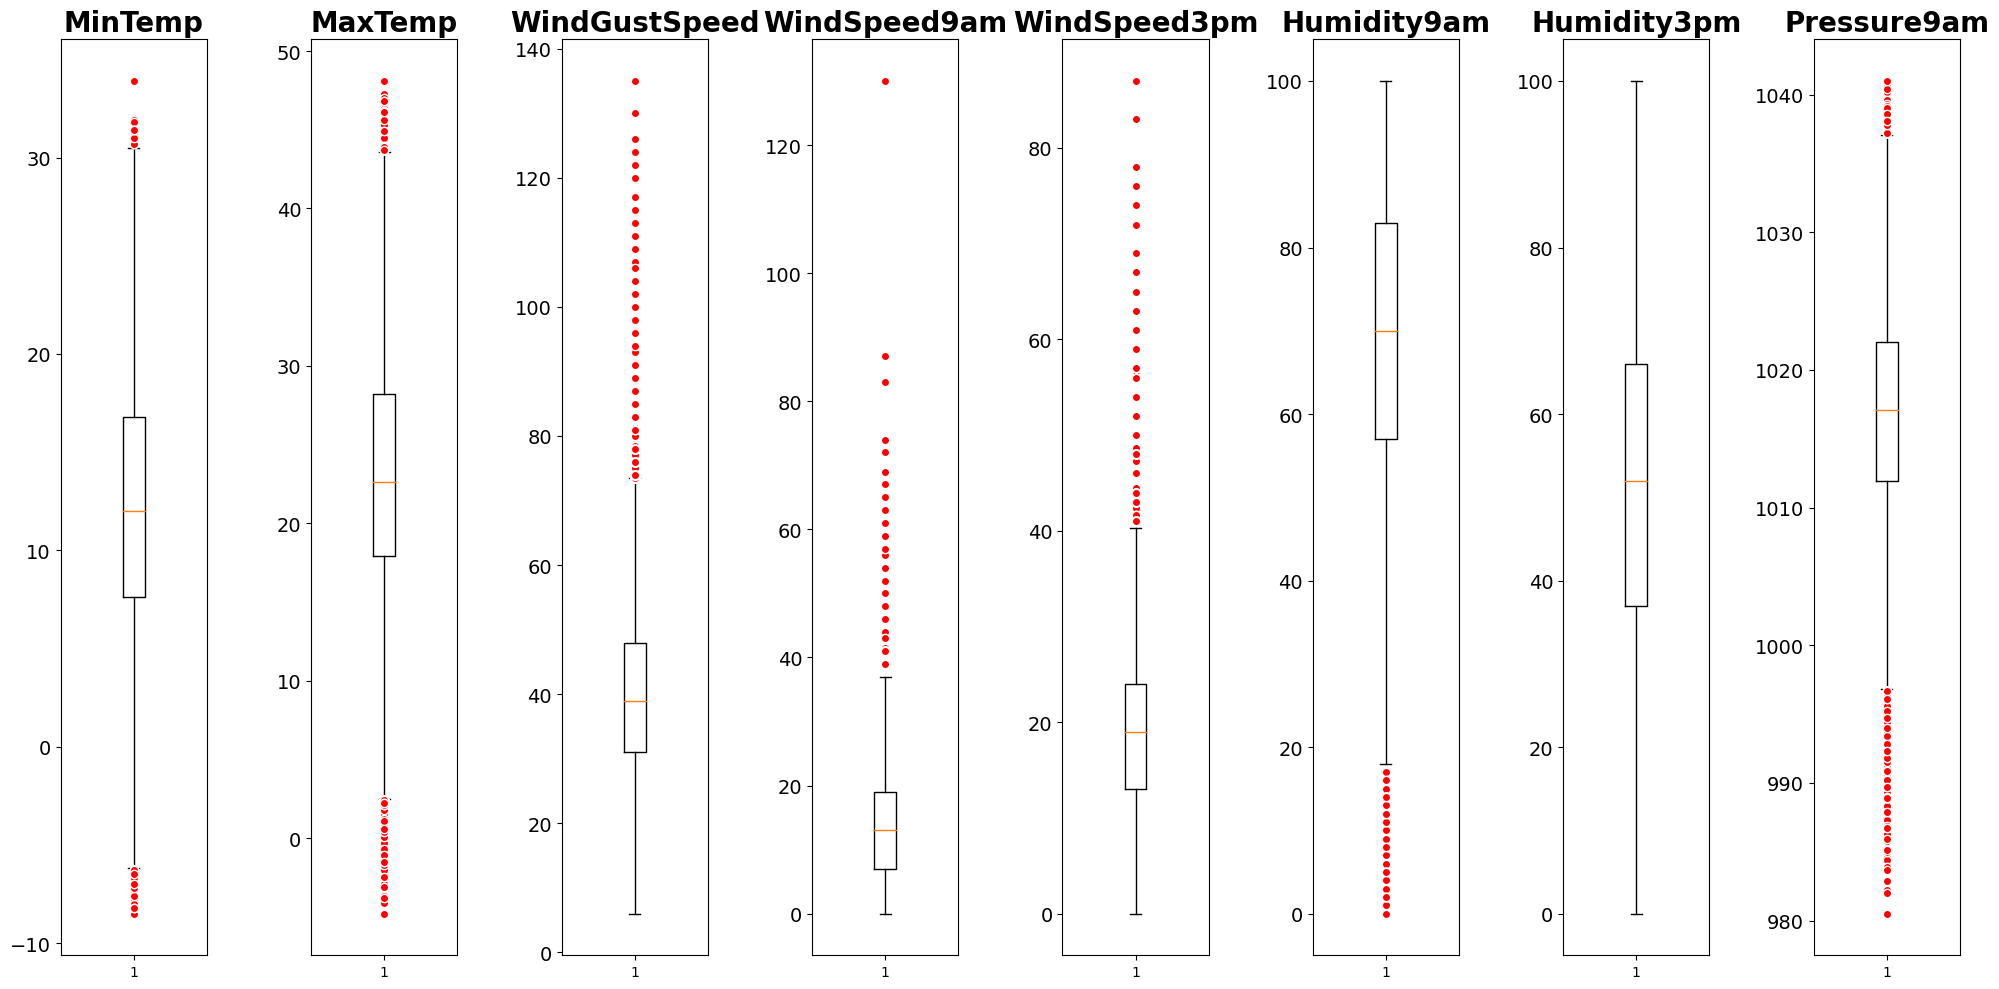

In [16]:
# Check for outliers in independent variable

def boxplot_all_cols_df(df):
  #Creating subplot of each column with its own scale
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
      
  plt.tight_layout()


df_numerical_features_adelaide = df_adelaide[['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am',]]
boxplot_all_cols_df(df_numerical_features_adelaide)

# Except humidity related vars, all other vars have outliers which can be managed via transformations. But, we should not remove outliers 
# contd.., because these does not look like fault in data collection..rather these might be genuine data points in extreme weather.

In [17]:
# Check for skewness
from scipy.stats import skew

# Verify skewness of the transformed data.
def verify_skew_via_val_and_via_pairplot(df):
  df_temp = df.copy(deep=True)
  skewness = df_temp.apply(lambda x: skew(x))
  print("skewness of cols is shown below.\n", skewness)
  return


verify_skew_via_val_and_via_pairplot(df_numerical_features_adelaide)

# Skew above abs value of 0.5 is considered moderately skewed. We can take log transform of first 3 vars.

skewness of cols is shown below.
 MinTemp          0.022543
MaxTemp          0.224743
WindGustSpeed    0.794558
WindSpeed9am     0.774537
WindSpeed3pm     0.625220
Humidity9am     -0.486541
Humidity3pm      0.024123
Pressure9am      0.004999
dtype: float64


In [18]:
# X, y split and train test split before doing any transformation on dataset.

from sklearn.model_selection import train_test_split

y = df_adelaide["RainTomorrow"]
X = df_adelaide.drop(["RainTomorrow"], axis=1)
cols = X.columns


training_percent = 0.7
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = training_percent,random_state=100)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [19]:
# Verify once again the skewness in data - only numerical fields 
# Log transform of the skewed numerical features and outlier related features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import boxcox
from scipy.special import boxcox1p

from sklearn.preprocessing import PowerTransformer
import joblib

power = PowerTransformer(method='yeo-johnson', standardize=False)


def skew_verification(df, transform_type, skewed_features, df2):
  lam_dict = {}
  if transform_type == "log":
    df[skewed_features] = np.log1p(df[skewed_features])
  elif transform_type == "boxcox":
    for feature in skewed_features:
      df[feature], lam_dict[feature] = boxcox1p(df[feature])
  elif transform_type == "yeo-johnson":
#     df[skewed_features] = power.fit_transform(df[skewed_features])
    power.fit(df[skewed_features])
    joblib.dump(power, "./model_artifacts/power.bin", compress=True)
    # # Register model
    # from azureml.core.model import Model
    # Model.register(ws, model_name="rf_joblib", model_path="./power.bin")
    df[skewed_features] = power.transform(df[skewed_features])
    df2[skewed_features] = power.transform(df2[skewed_features])

  else:
    print("unknown transform type")
  return df, df2, lam_dict

skewed_outliers_features = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am']  # those skewed
X_train_tf, X_test_tf, _ = skew_verification(X_train.copy(deep=True), "yeo-johnson", skewed_outliers_features, X_test.copy(deep=True),)

verify_skew_via_val_and_via_pairplot(X_train_tf[skewed_outliers_features])
verify_skew_via_val_and_via_pairplot(X_test_tf[skewed_outliers_features])

# We tried log transform but did not get good result. Then tried boxcox transform which does not work well on data containing 0 or -ve.
# contd.. We used boxcox1p which requires lambda param which was additional work so, we went with yeo-johnson which has reduced skewness.

skewness of cols is shown below.
 WindGustSpeed    0.005385
WindSpeed9am    -0.057679
WindSpeed3pm     0.014040
Humidity9am     -0.116184
dtype: float64
skewness of cols is shown below.
 WindGustSpeed    0.006570
WindSpeed9am    -0.061261
WindSpeed3pm     0.023609
Humidity9am     -0.111085
dtype: float64


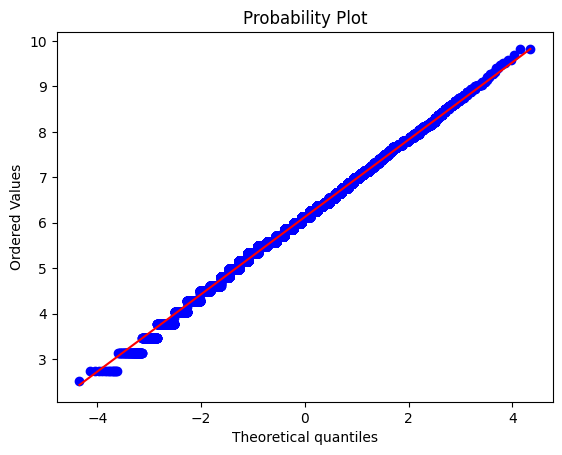

In [20]:
# QQ plot of variables done one after another to check outliers and skewness of transformed data
from scipy.stats import probplot

# ['MinTemp', 'MaxTemp', 'WindGustSpeed']
probplot(X_train_tf['WindGustSpeed'], dist="norm", plot=plt)  # Tried same plot for other parameters as well and for X_test_tf as well
plt.show()

# There is not much skewness visible in QQ plot as well.

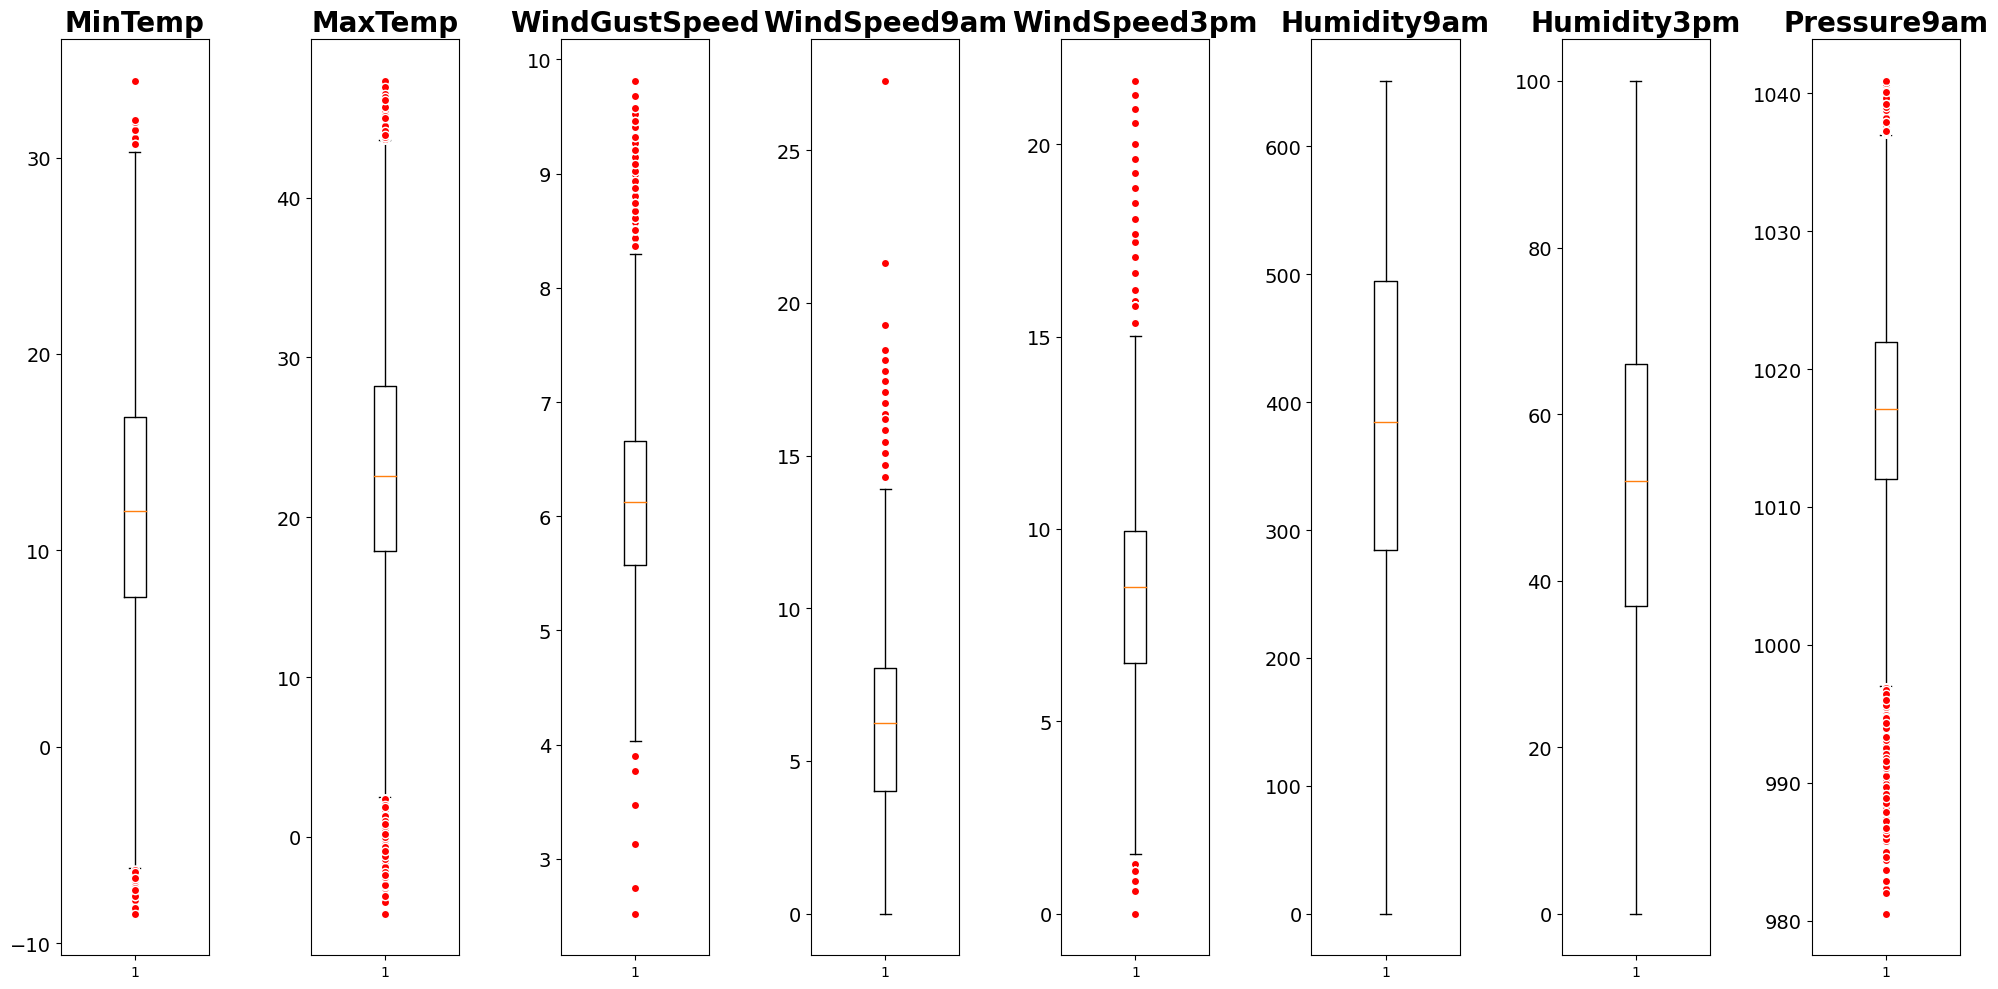

In [21]:
# Check for outliers on transformed data

df_numerical_features_adelaide = X_train_tf[['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am',]]
boxplot_all_cols_df(df_numerical_features_adelaide)

In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

cols_for_standardization = ['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am']
std_scaler = StandardScaler()
std_scaler.fit(X_train_tf[cols_for_standardization])
X_train_tf[cols_for_standardization] = std_scaler.transform(X_train_tf[cols_for_standardization])
X_test_tf[cols_for_standardization] = std_scaler.transform(X_test_tf[cols_for_standardization])

joblib.dump(std_scaler, './model_artifacts/std_scaler.bin', compress=True)  # dump the scaler

['./model_artifacts/std_scaler.bin']

In [23]:
# label encoding RainTomorrow variables. To be done for target variable. Not to be done with nominal var in independent vars. 
# contd.. can be done (with ordering) for ordinal vars in independent vars

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
joblib.dump(le, './model_artifacts/le.bin', compress=True)

['./model_artifacts/le.bin']

In [24]:
# Encode categorical variables with binary values but are really important - use one hot encoder for RainToday
from sklearn.preprocessing import OneHotEncoder
import joblib

# NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
# of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
# have huge  number of categorical variables

ohe = OneHotEncoder()
ohe.fit(X_train_tf[['RainToday']])  # , 'month']])
one_hot_encoded_data_train = ohe.transform(X_train_tf[['RainToday']]).toarray()  # , 'month'
feature_names = ohe.get_feature_names(['RainToday'])  # ,'month'
df_for_concatenation = pd.DataFrame(one_hot_encoded_data_train,columns=feature_names).astype(int)
X_train_tf = pd.concat([X_train_tf, df_for_concatenation], axis=1).drop(['RainToday'], axis=1)

one_hot_encoded_data_test = ohe.transform(X_test_tf[['RainToday']]).toarray()  # , 'month'
df_for_concatenation = pd.DataFrame(one_hot_encoded_data_test,columns=feature_names).astype(int)
X_test_tf = pd.concat([X_test_tf, df_for_concatenation], axis=1).drop(['RainToday'], axis=1)

joblib.dump(ohe, "./model_artifacts/ohe.bin", compress=True)

['./model_artifacts/ohe.bin']

In [25]:
# Encode categorical variables with multiple values - WindGustDir, WindDir9am, WindDir3pm. Use Frequency Encoding 
import joblib

def freq_encode(df, df_test):
    WindGustDir_FE = df.groupby('WindGustDir').size()/len(df)
    joblib.dump(WindGustDir_FE, "./model_artifacts/WindGustDir_FE.bin", compress=True)
    df.loc[:, 'WindGustDir_Freq_Encoded'] = df['WindGustDir'].map(WindGustDir_FE)
    df_test.loc[:, 'WindGustDir_Freq_Encoded'] = df_test['WindGustDir'].map(WindGustDir_FE)

    WindDir9am_FE = df.groupby('WindDir9am').size()/len(df)
    joblib.dump(WindDir9am_FE, "./model_artifacts/WindDir9am_FE.bin", compress=True)
    df.loc[:, 'WindDir9am_Freq_Encoded'] = df['WindDir9am'].map(WindDir9am_FE)
    df_test.loc[:, 'WindDir9am_Freq_Encoded'] = df_test['WindDir9am'].map(WindDir9am_FE)

    WindDir3pm_FE = df.groupby('WindDir3pm').size()/len(df)
    joblib.dump(WindDir3pm_FE, "./model_artifacts/WindDir3pm_FE.bin", compress=True)
    df.loc[:, 'WindDir3pm_Freq_Encoded'] = df['WindDir3pm'].map(WindDir3pm_FE)
    df_test.loc[:, 'WindDir3pm_Freq_Encoded'] = df_test['WindDir3pm'].map(WindDir3pm_FE)

    Location_FE = df.groupby('Location').size()/len(df)
    joblib.dump(Location_FE, "./model_artifacts/Location_FE.bin", compress=True)
    df.loc[:, 'Location_Freq_Encoded'] = df['Location'].map(Location_FE)
    df_test.loc[:, 'Location_Freq_Encoded'] = df_test['Location'].map(Location_FE)

    df = df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location', 'Date'], axis=1)  # month
    df_test = df_test.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location', 'Date'], axis=1)  # month
    return df, df_test

X_train_tf, X_test_tf = freq_encode(X_train_tf, X_test_tf)

In [26]:
X_test_tf

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday_No,RainToday_Yes,WindGustDir_Freq_Encoded,WindDir9am_Freq_Encoded,WindDir3pm_Freq_Encoded,Location_Freq_Encoded
0,0.144576,-0.915710,-0.076818,0.026478,0.513618,0.853030,1.943103,0.162589,0,1,0.058803,0.068197,0.053830,0.020656
1,-0.261715,-0.479809,-1.127353,-0.450042,0.247717,-0.390029,0.403176,0.850052,1,0,0.057266,0.068197,0.053830,0.021349
2,-0.886778,0.631034,0.359410,0.448042,0.137892,-1.910379,-1.858592,0.086204,1,0,0.065454,0.068840,0.060582,0.011041
3,1.519714,2.234022,0.359410,0.738628,0.667805,-1.035041,-1.184873,-0.538762,1,0,0.084905,0.060130,0.055448,0.020897
4,1.941632,1.024750,-0.313958,-0.450042,-0.573545,0.732761,1.509999,-1.483156,0,1,0.071573,0.056282,0.046577,0.020957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42653,-1.058670,-1.253181,0.998608,0.242831,1.343840,0.732761,0.691912,-0.733196,1,0,0.071573,0.059868,0.071231,0.021480
42654,-1.730612,0.096704,-0.480359,-2.082575,-0.088483,-1.874006,-2.051082,0.905605,1,0,0.065454,0.068840,0.060180,0.021530
42655,0.378975,-0.845403,1.173331,1.599309,1.343840,0.554982,1.702490,0.238974,1,0,0.064922,0.056402,0.065243,0.021349
42656,1.613474,1.994980,1.173331,0.738628,1.062084,-1.218613,-1.232996,-1.344275,1,0,0.066549,0.068840,0.080464,0.019270


In [27]:
# ROC - AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_auc(classifier, y_pred_proba, y_test):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='Knn')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
#     plt.title('Knn(n_neighbors={}) ROC curve'.format(k))
    plt.show()
    
    auc_val = roc_auc_score(y_test,y_pred_proba)
    print("auc is {}".format(auc_val))

LogisticRegression
[[31271  5269]
 [ 1852  4266]]
0.8330676543672934
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33123
           1       0.70      0.45      0.55      9535

    accuracy                           0.83     42658
   macro avg       0.78      0.70      0.72     42658
weighted avg       0.82      0.83      0.82     42658



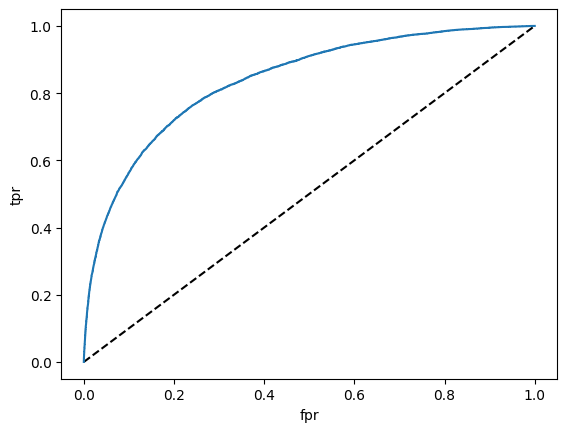

auc is 0.8386716077769023


Naive bayes
[[27836  4251]
 [ 5287  5284]]
0.77640770781565
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     33123
           1       0.50      0.55      0.53      9535

    accuracy                           0.78     42658
   macro avg       0.68      0.70      0.69     42658
weighted avg       0.79      0.78      0.78     42658



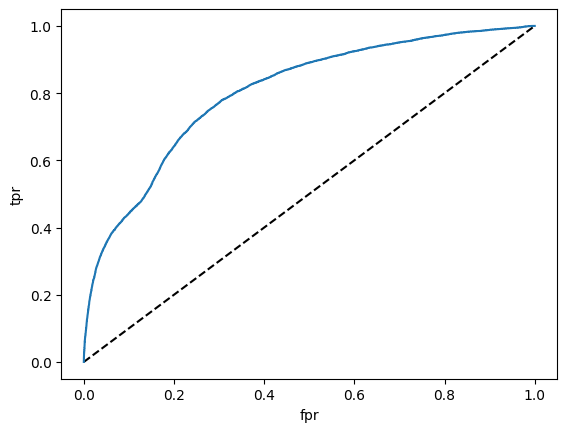

auc is 0.8033132928242337


RandomForest
[[31631  4988]
 [ 1492  4547]]
0.848094144123025
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     33123
           1       0.75      0.48      0.58      9535

    accuracy                           0.85     42658
   macro avg       0.81      0.72      0.75     42658
weighted avg       0.84      0.85      0.83     42658



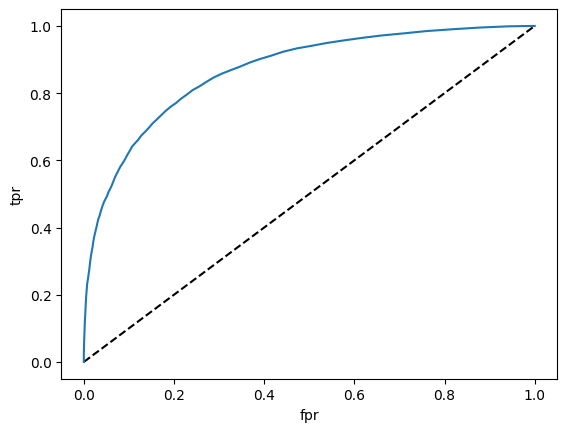

auc is 0.8675195285608246


Decision Tree 
[[28174  4659]
 [ 4949  4876]]
0.7747667494959913
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     33123
           1       0.50      0.51      0.50      9535

    accuracy                           0.77     42658
   macro avg       0.68      0.68      0.68     42658
weighted avg       0.78      0.77      0.78     42658



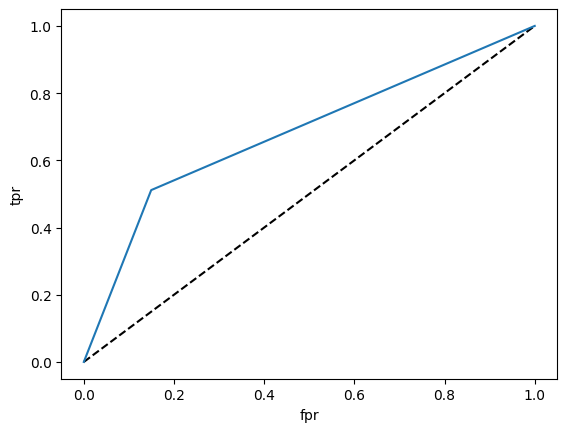

auc is 0.6809831673940172




In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import classification_report


models = []
models.append(('LogisticRegression',LogisticRegression(solver='liblinear')))
models.append(('Naive bayes' ,GaussianNB()))
models.append(('RandomForest' ,RandomForestClassifier()))
models.append(('Decision Tree ' ,DecisionTreeClassifier()))
# models.append (('KNN' ,KNeighborsClassifier()))

for name , model in models :
    print(name)
    model.fit(X_train_tf , y_train)
    prediction = model.predict(X_test_tf)   
    prediction_proba = model.predict_proba(X_test_tf)[:,1]
    print(confusion_matrix(prediction,y_test))
    print(accuracy_score(prediction,y_test))
    print(classification_report(y_test, prediction))
    auc_val = roc_auc(model, prediction_proba, y_test)
    print('\n')

In [29]:
# Feature importance using RF

rfc=RandomForestClassifier()

rfc.fit(X_train_tf , y_train)
fi = rfc.feature_importances_
fi

array([0.08067248, 0.07958795, 0.08329802, 0.050138  , 0.05426857,
       0.08357222, 0.2180064 , 0.093753  , 0.03357466, 0.02948327,
       0.04506261, 0.04520809, 0.04595005, 0.05742468])

In [30]:
# list columns which are important (importance greater than 0.01)
fi_df = pd.DataFrame({'cols':X_train_tf.columns, 'imp':fi}).sort_values('imp', ascending=False)
lst_cols = list(fi_df.loc[fi_df['imp']>0.01]['cols'])
lst_cols = lst_cols[0:12] # Removing Rain related var as there were some issues in Azure ML in inferenceing part for the same.
lst_cols

['Humidity3pm',
 'Pressure9am',
 'Humidity9am',
 'WindGustSpeed',
 'MinTemp',
 'MaxTemp',
 'Location_Freq_Encoded',
 'WindSpeed3pm',
 'WindSpeed9am',
 'WindDir3pm_Freq_Encoded',
 'WindDir9am_Freq_Encoded',
 'WindGustDir_Freq_Encoded']

In [31]:
# Recreate the model with selected features

rfc=RandomForestClassifier()

rfc.fit(X_train_tf[lst_cols], y_train)

prediction = rfc.predict(X_test_tf[lst_cols])   
prediction_proba = rfc.predict_proba(X_test_tf[lst_cols])[:,1]
print('confusion matrix for test is \n', confusion_matrix(prediction,y_test))
print('confusion matrix for train is \n', confusion_matrix(rfc.predict(X_train_tf[lst_cols]),y_train))
print('accuracy sores for test and train are ', accuracy_score(prediction,y_test), accuracy_score(rfc.predict(X_train_tf[lst_cols]), y_train))
print(classification_report(y_test, prediction))

# Inference - REduction of features seems to have no effect. upon checking train accuracy, it is clear cut case of overfitting. 
# contd...  Hence, let's concentrate on tuning using grid search

confusion matrix for test is 
 [[31633  5057]
 [ 1490  4478]]
confusion matrix for train is 
 [[77193     2]
 [    0 22340]]
accuracy sores for test and train are  0.8465235125884946 0.9999799065655297
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     33123
           1       0.75      0.47      0.58      9535

    accuracy                           0.85     42658
   macro avg       0.81      0.71      0.74     42658
weighted avg       0.84      0.85      0.83     42658



In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [5, 10, 15, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
# CV_rfc.fit(X_train_tf, y_train)

# CV_rfc.best_params_

# Grid search took a lot of time so cancelled it and manually tried getting the right params in next cell

In [33]:
# Recreate the model with selected features

rfc=RandomForestClassifier(max_depth=8, max_features=None, n_estimators = 30, random_state=0)

rfc.fit(X_train_tf[lst_cols], y_train)

prediction = rfc.predict(X_test_tf[lst_cols])   
prediction_proba = rfc.predict_proba(X_test_tf[lst_cols])[:,1]
print('confusion matrix for test is \n', confusion_matrix(prediction,y_test))
print('confusion matrix for train is \n', confusion_matrix(rfc.predict(X_train_tf[lst_cols]),y_train))
print('accuracy sores for test and train are ', accuracy_score(prediction,y_test), accuracy_score(rfc.predict(X_train_tf[lst_cols]), y_train))
print(classification_report(y_test, prediction))

# this seems to be perfect fit wherein train and test acc are extremely close and we dont see much underfitting and overfitting.

confusion matrix for test is 
 [[31789  5490]
 [ 1334  4045]]
confusion matrix for train is 
 [[74552 12296]
 [ 2641 10046]]
accuracy sores for test and train are  0.840030006094988 0.8499321846586628
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     33123
           1       0.75      0.42      0.54      9535

    accuracy                           0.84     42658
   macro avg       0.80      0.69      0.72     42658
weighted avg       0.83      0.84      0.82     42658



In [34]:
# Save the model to do inference and deployment. Inference code and deployment in Azure
import joblib

joblib.dump(rfc, "./model_artifacts/random_forest_v4.joblib")

['./model_artifacts/random_forest_v4.joblib']

In [35]:
import urllib.request
from azureml.core.model import Model

# Register model
model = Model.register(ws, model_name="rf_joblib", model_path="./model_artifacts/")  # random_forest_v4.joblib")

Registering model rf_joblib


In [36]:
from azureml.core import Environment
from azureml.core.model import InferenceConfig

env = Environment(name="project_environment")

python_packages = ['numpy', 'pandas', 'seaborn', 'matplotlib', 'scipy', 'scikit-learn', 'joblib','requests']
for package in python_packages:
    env.python.conda_dependencies.add_pip_package(package)

inference_config = InferenceConfig(
    environment=env,
    source_directory="./source_dir",
    entry_script="./echo_score.py",
)

In [41]:
from azureml.core.webservice import LocalWebservice
from azureml.core.webservice import AciWebservice

# deployment_config = LocalWebservice.deploy_configuration(port=6789)

deployment_config = AciWebservice.deploy_configuration(
    cpu_cores=0.5, memory_gb=1, auth_enabled=True
)

In [42]:
service = Model.deploy(
    ws,
    "myservice",
    [model],
    inference_config,
    deployment_config,
    overwrite=True,
)
service.wait_for_deployment(show_output=True)

print(service.get_logs())

/tmp/ipykernel_18038/202120244.py:1: FutureWarning: azureml.core.model:
To leverage new model deployment capabilities, AzureML recommends using CLI/SDK v2 to deploy models as online endpoint, 
please refer to respective documentations 
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoints /
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoint-sdk-v2 /
https://docs.microsoft.com/azure/machine-learning/how-to-attach-kubernetes-anywhere 
For more information on migration, see https://aka.ms/acimoemigration. 
To disable CLI/SDK v1 deprecation warning set AZUREML_LOG_DEPRECATION_WARNING_ENABLED to 'False'
  service = Model.deploy(


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-12-27 08:24:00+00:00 Creating Container Registry if not exists.
2022-12-27 08:24:00+00:00 Registering the environment.
2022-12-27 08:24:02+00:00 Use the existing image.
2022-12-27 08:24:02+00:00 Generating deployment configuration.
2022-12-27 08:24:04+00:00 Submitting deployment to compute.
2022-12-27 08:24:08+00:00 Checking the status of deployment myservice..
2022-12-27 08:26:32+00:00 Checking the status of inference endpoint myservice.
Succeeded
ACI service creation operation finished, operation "Succeeded"
/bin/bash: /azureml-envs/azureml_5de76a674a39ac12a6951d62aad2f48e/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /azureml-envs/azureml_5de76a674a39ac12a6951d62aad2f48e/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/ba

In [40]:
# Local Testing

import requests
import json

uri = service.scoring_uri
requests.get("http://localhost:6789")
headers = {"Content-Type": "application/json"}

data = {"Date":"12/1/2008","Location":"Albury","MinTemp":13,"MaxTemp":22,"Rainfall":0.65,
"Evaporation":None,"Sunshine":None,"WindGustDir":"W","WindGustSpeed":40.0,"WindDir9am":"W",
"WindDir3pm":"WNW","WindSpeed9am":20.0,"WindSpeed3pm":24.0,"Humidity9am":71.0,"Humidity3pm":22.0,
"Pressure9am":1007.7,"Pressure3pm":1000.1,"Cloud9am":6.0,"Cloud3pm":None,"Temp9am":16.9,
"Temp3pm":21.8,"RainToday":"No","RISK_MM":0.0}
data = json.dumps(data)
response = requests.post(uri, data=data, headers=headers)
print(response.json())

test is [0] ['No']


In [43]:
# Testing Remote Test Calls

import requests
import json
from azureml.core import Webservice

service = Webservice(workspace=ws, name="myservice")
scoring_uri = service.scoring_uri

# If the service is authenticated, set the key or token
key, _ = service.get_keys()

# Set the appropriate headers
headers = {"Content-Type": "application/json"}
headers["Authorization"] = f"Bearer {key}"

# Make the request and display the response and logs
data = {"Date":"12/1/2008","Location":"Albury","MinTemp":13,"MaxTemp":22,"Rainfall":0.65,
"Evaporation":None,"Sunshine":None,"WindGustDir":"W","WindGustSpeed":40.0,"WindDir9am":"W",
"WindDir3pm":"WNW","WindSpeed9am":20.0,"WindSpeed3pm":24.0,"Humidity9am":71.0,"Humidity3pm":22.0,
"Pressure9am":1007.7,"Pressure3pm":1000.1,"Cloud9am":6.0,"Cloud3pm":None,"Temp9am":16.9,
"Temp3pm":21.8,"RainToday":"No","RISK_MM":0.0}

data = json.dumps(data)
resp = requests.post(scoring_uri, data=data, headers=headers)
print(resp.text)

"test is [0] ['No']"
